Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     17194
           1       0.85      0.28      0.42      2270

    accuracy                           0.91     19464
   macro avg       0.88      0.64      0.69     19464
weighted avg       0.91      0.91      0.89     19464

Accuracy: 0.9101931771475544


/Users/gokulganesan/.pyenv/versions/3.12.2/lib/python3.12/site-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


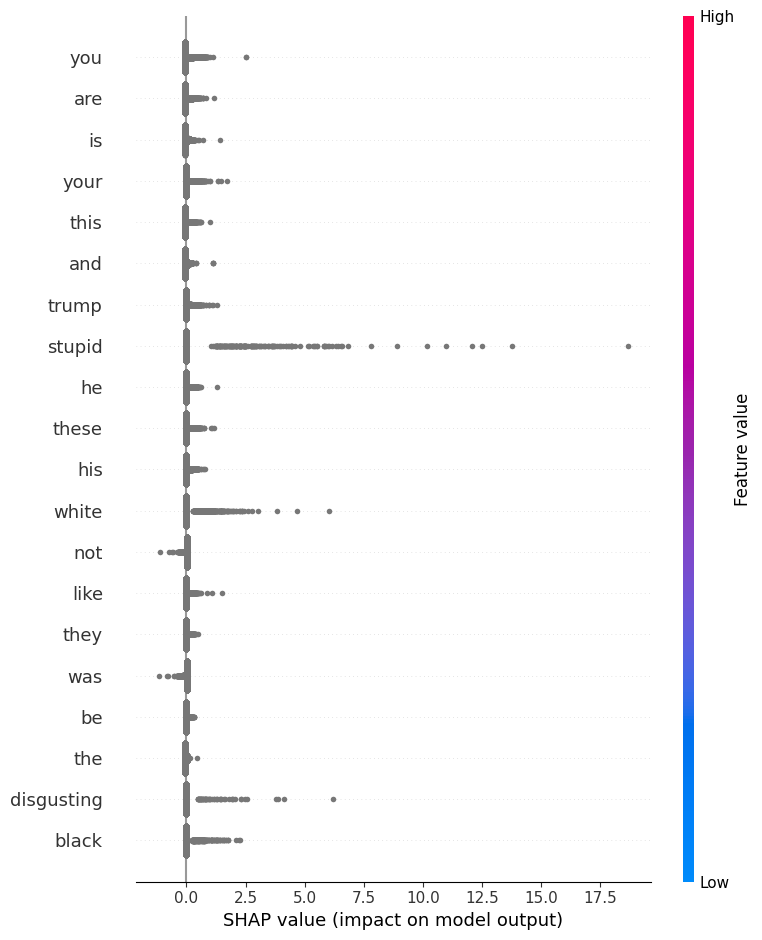

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import shap
import matplotlib.pyplot as plt

# Load the data from the CSV file
data_path = 'jigsaw-unintended-bias-in-toxicity-classification/test_private_expanded.csv'
df = pd.read_csv(data_path)

# Fill missing values in the target column and binarize the toxicity column
df["toxicity"] = df["toxicity"].fillna(0).apply(lambda x: 1 if x > 0.3 else 0)

# Split into features and target
X = df["comment_text"]
y = df["toxicity"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Text vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a logistic regression model
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_tfidf, y_train)

# Predictions
y_pred = clf.predict(X_test_tfidf)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# SHAP analysis


/Users/gokulganesan/.pyenv/versions/3.12.2/lib/python3.12/site-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


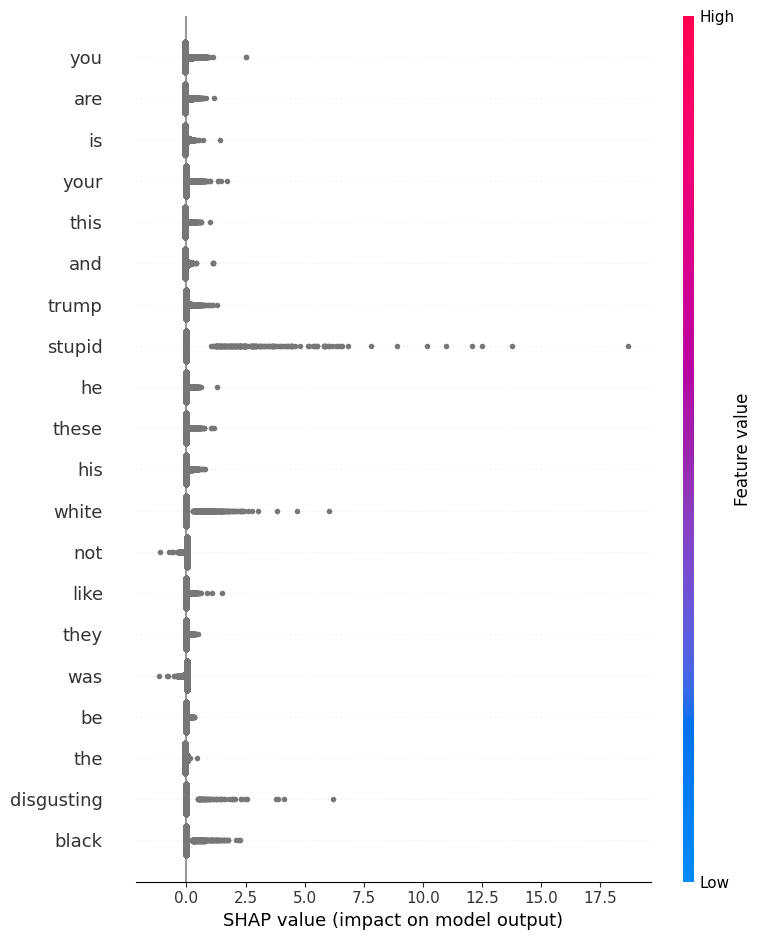

  (0, 8382)	0.19949492250735262
  (0, 8373)	0.14287973721710603
  (0, 6835)	0.20011916497380058
  (0, 5898)	0.6390517636769107
  (0, 5351)	0.10756066556020402
  (0, 4894)	0.5991450747222992
  (0, 4079)	0.08375708013886508
  (0, 2169)	0.2689355618990707
  (0, 1112)	0.2036335371962932


In [7]:
explainer = shap.LinearExplainer(
    clf, X_train_tfidf, feature_perturbation="interventional"
)
shap_values = explainer.shap_values(X_test_tfidf)

# Plot SHAP summary
shap.summary_plot(
    shap_values, X_test_tfidf, feature_names=tfidf.get_feature_names_out()
)

# Display a SHAP explanation for a random comment
random_index = 3  # change this index to see explanations for other comments
print(X_test_tfidf[random_index, :])
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[random_index, :],
    X_test_tfidf[random_index, :].toarray().flatten(),
    feature_names=tfidf.get_feature_names_out(),
)